     jd_time      
------------------
 2459411.769469074
  2459413.04686331
2459404.8554204167
2459411.6955423495
  2459407.09394309
2459411.6765334723
2459413.0414316435
2459411.7656178586
2459406.0541683217
  2459411.77847566
               ...
2459406.0557370023
2459404.8592686113
2459411.6941857985
2459413.0441603474
2459411.7630553124
2459403.6334701735
 2459407.095286296
2459411.6860502893
2459403.6253220025
2459404.8515081364
  2459405.63869081
Length = 136 rows


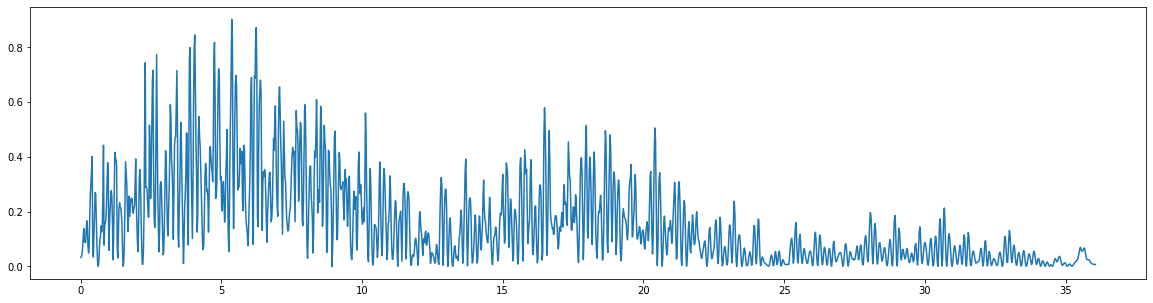

In [4]:
from astropy.time import Time
from astropy.table import Table
from glob import glob
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle


data = Table.read("light_curve.csv")
jd_time = []
for time in data['time']:
    jd_time.append(Time(time).jd)
data['jd_time'] = jd_time
print(data['jd_time'])

t = data['jd_time']
y = data['mag']

frequency, power = LombScargle(t, y).autopower()
plt.figure(figsize=(20,5))
plt.plot(frequency, power)      
plt.show()

#print(frequency[list(power).index(max_power)])

In [3]:
max_power = max(power)
powers = list(power)
power_unsort = list(power)
powers.sort(reverse=True)
for i in range(5):
    print(1/frequency[power_unsort.index(powers[i])],powers[i])

0.18606855321851884 0.9024037179494753
0.1601642724648371 0.872283273553383
0.24631006914305237 0.8456177286968976
0.1853374390604893 0.8318868423032815
0.16070997697067982 0.8301334907588458


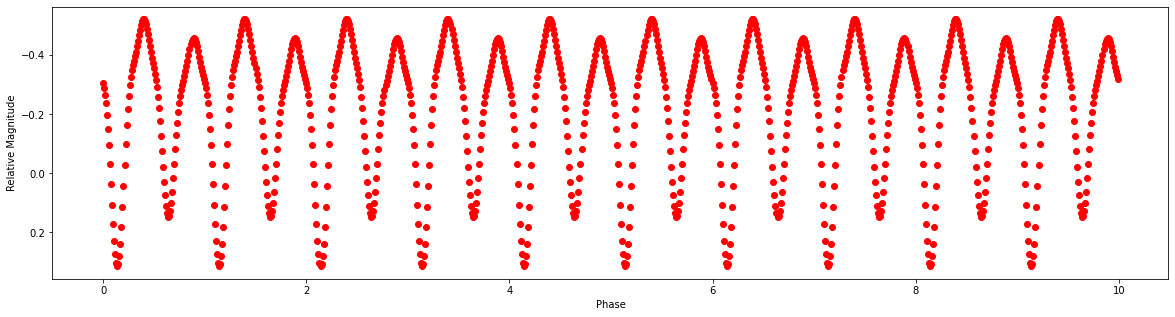

In [11]:
def fourier_function(times):
    m = -2.1374e-01
    a = [4.126828e-02, 3.140757e-01, 2.569892e-02, 8.284743e-02,1.422211e-02, 4.284529e-02]
    b = [-3.434924e-02,-3.155610e-02,-3.884087e-03, -1.697842e-02,-3.133136e-03,-1.354564e-02]
    x_off = 0.15
    s = []
    for time in times:
        ans = m
        for count, a_n in enumerate(a):
            ans += (a_n*np.cos(2*np.pi*(time-x_off)*(count+1))+b[count]*np.sin(2*np.pi*(time-x_off)*(count+1)))
        s.append(ans)
    return s

times = np.arange(0,10,0.01)
values = fourier_function(times)
plt.figure(figsize=(20,5))
plt.gca().invert_yaxis()
plt.plot(times, values, 'o', color='red')
#plt.plot(data_table['time']/period, data_table['mag'], 'o', color='k')
plt.xlabel('Phase')
plt.ylabel('Relative Magnitude')
plt.show()